# Dealing With Missing Values in PIMA Dataset and Imputing using various techniques

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
# Reading the dataset

df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Step 1 
Step 1: We observed that, there are no null values.

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Step 2
Step 2: Checking for inconsistent column names, which may be problematic in future operations.

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Step 3
Step 3: Checking for minimum and maximum values

In [8]:
for i in df:
    print("minimum " +str(i)+ " " + str(df[i].min()) +" ; " + "maximum " + str(df[i].max()))

minimum Pregnancies 0 ; maximum 17
minimum Glucose 0 ; maximum 199
minimum BloodPressure 0 ; maximum 122
minimum SkinThickness 0 ; maximum 99
minimum Insulin 0 ; maximum 846
minimum BMI 0.0 ; maximum 67.1
minimum DiabetesPedigreeFunction 0.078 ; maximum 2.42
minimum Age 21 ; maximum 81
minimum Outcome 0 ; maximum 1


## Step 4
Step 4: Visualizing the maximum, minimum and distribution of values

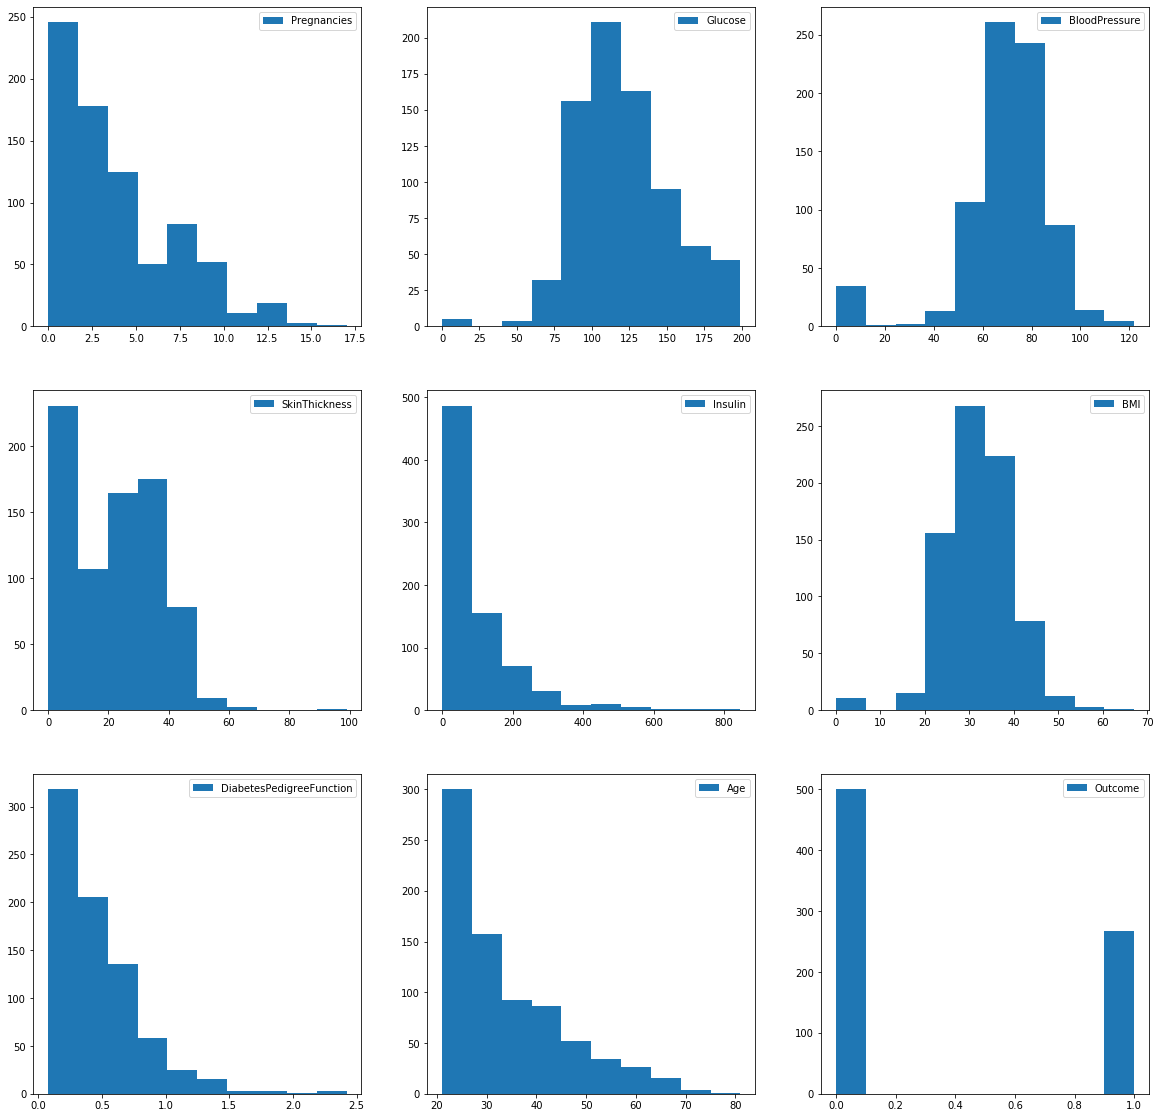

In [9]:
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(20,20))
for axes,columns in zip(ax.flatten(),df.columns):
    axes.hist(df[columns])
    axes.legend([columns])
plt.show()

# Step 5
Step 5: Glucose level , BloodPressure, SkinThickness, Insulin level, BMI can not be zero. So the 0 values present in the 
respective columns should be treated as missing values and replaced by NaN. 
And SkinThickness has a maximum value of 99, which is an invalid value. This one also be removed.

In [10]:
na_dict = {}
for col in df.columns:
    na_dict[col] = df[df[col]==0][col].shape[0]

print("The following columns have value as 0; valid 0 values are for pregnancies and Outcome")
print("-------------------------------------------------------------------------------------")
for key, value in na_dict.items():
    print(key , " : ", na_dict[key])

The following columns have value as 0; valid 0 values are for pregnancies and Outcome
-------------------------------------------------------------------------------------
Pregnancies  :  111
Glucose  :  5
BloodPressure  :  35
SkinThickness  :  227
Insulin  :  374
BMI  :  11
DiabetesPedigreeFunction  :  0
Age  :  0
Outcome  :  500


## Step 6
Step 6: Removing the invalid values and putting NaN inplace of those values

In [11]:
for col in df.columns:
    if col == 'Outcome' or col == 'Pregnancies':
        continue
    else:
        df.loc[df[col]==0, col] = np.nan

# Removing invalid value from skinthickness columns        
df.loc[df['SkinThickness']>60, 'SkinThickness'] = np.nan

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               539 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# Null matrix of the data frame 

In [13]:
# creating the dummy or null matrix which shows the number of null values and percentage of null values column wise

df_rec = pd.DataFrame()
df_rec['num_null'] = df.isnull().sum()
df_rec['percent_null'] = df.isnull().mean() *100

In [14]:
df_rec

,num_null,percent_null
Pregnancies,0,0.000000
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,229,29.817708
Insulin,374,48.697917
BMI,11,1.432292
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


# Visualizing missingness pattern by using missingno package

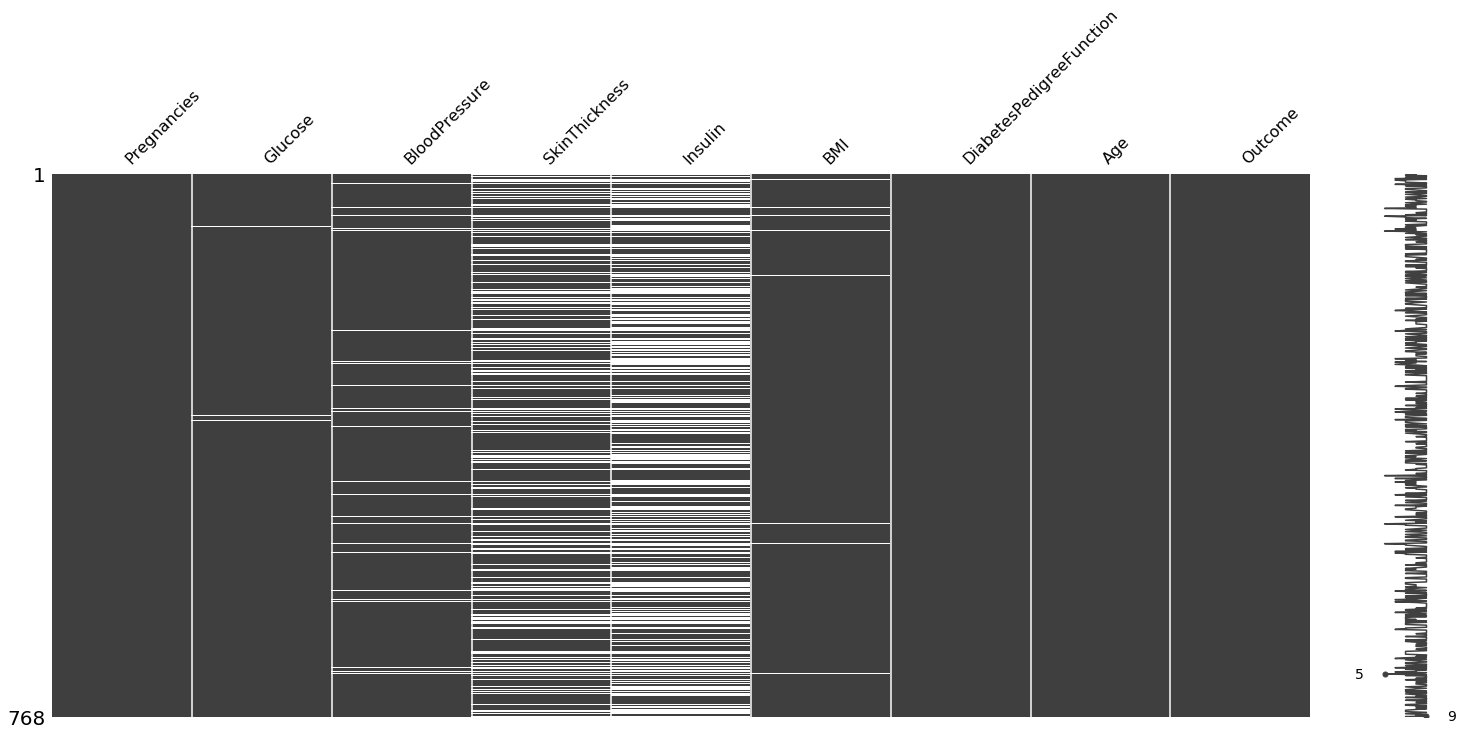

In [15]:
msno.matrix(df)

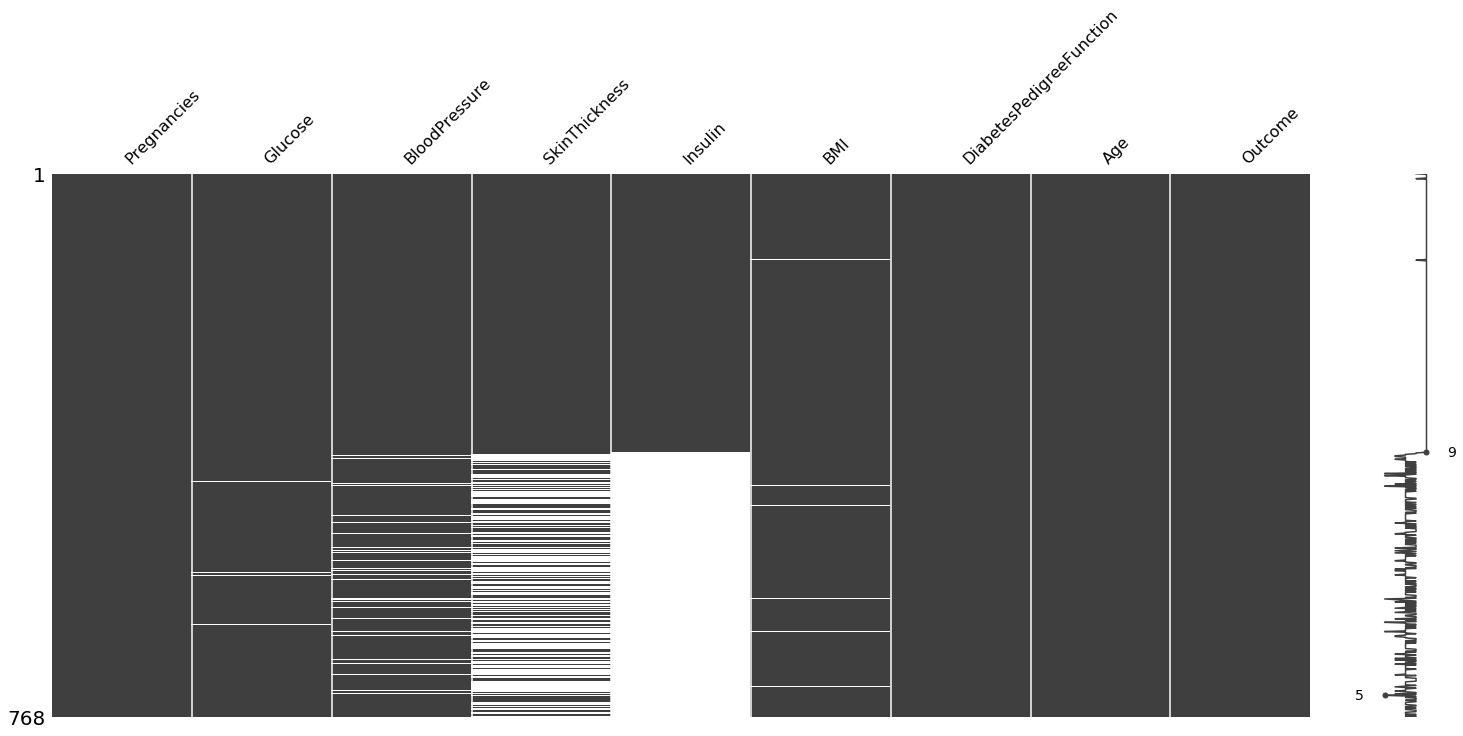

In [16]:
df_ = df.sort_values('Insulin')
msno.matrix(df_)

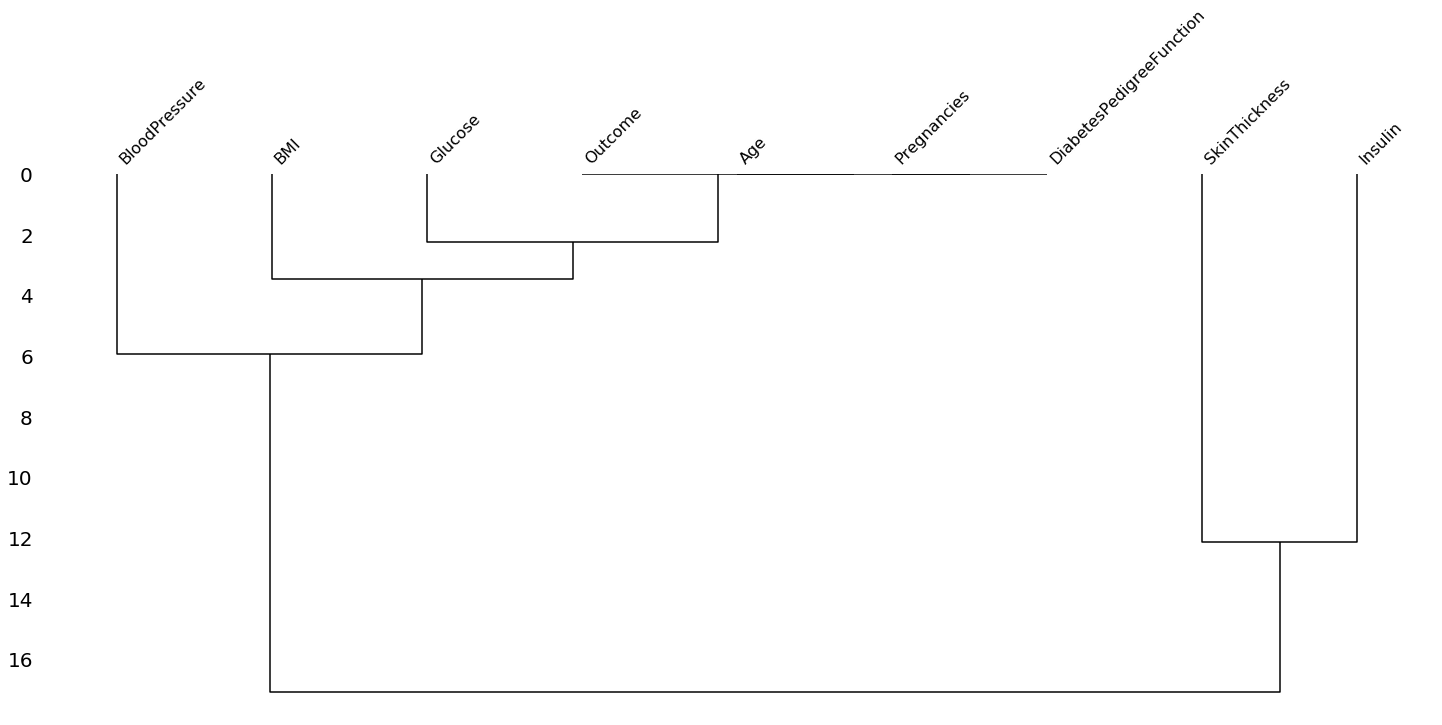

In [17]:
msno.dendrogram(df)

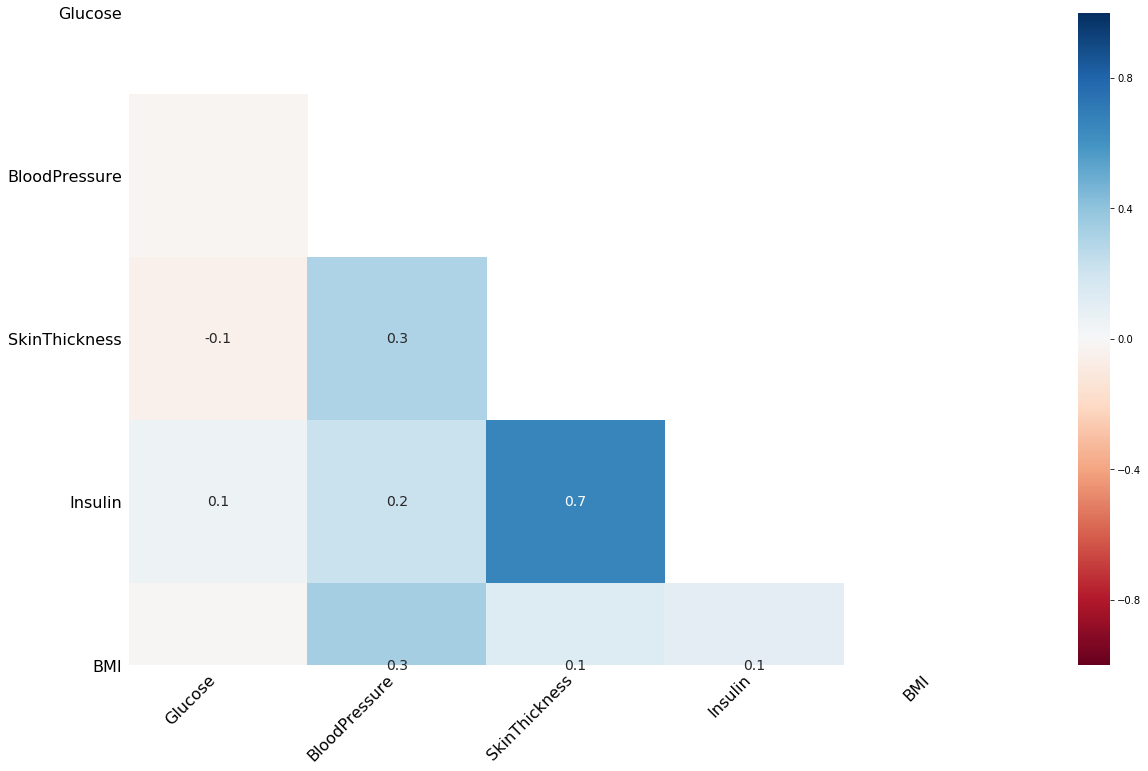

<Figure size 3.6x7.2 with 0 Axes>

In [18]:
msno.heatmap(df)
plt.figure(figsize=(0.05,0.1))
plt.show()

Observations:
-------------
* Missingness of BMI and Glucose are very less likely to be correlated. And very less in number. Those are MCAR. So we can drop null values.
* SkinThickness and Insuline has high missingness correlation and follows MNAR missingness pattern. So these columns should be imputed.
* Blood pressure is correlated to BMI but less in number. As there are 35 missing values nearly 5% of the data. We should impute this column.

In [19]:
# dropping na values in Glucose and BMI as these are MCAR
df.dropna(subset=['Glucose','BMI'], inplace=True,how='any')
df.shape

(752, 9)

## complete case analysis : Dropping all na values

In [20]:
print(df.shape)
complete_case = df.dropna(inplace=False)
complete_case.shape

(752, 9)


(391, 9)

## Simple Imputation Techniques

In [21]:
from sklearn.impute import SimpleImputer
strategy_simple = ['mean','median','most_frequent','constant']
imputed_dict = {}

for i in strategy_simple:
    df2 = df.copy(deep=True)
    if i == 'constant':
        imp = SimpleImputer(strategy=i, fill_value=0)
    else:
        imp = SimpleImputer(strategy=i)
    df2.iloc[:,:] = imp.fit_transform(df2)
    imputed_dict[i] = df2

## Imputing By KNN Imputer and MICE imputation techniques

In [22]:
# iterative imputer can also be imputed from fancy impute package 
# from fancy impute import knn and IterativeImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
it_imp = IterativeImputer(max_iter=500)
df_it = df.copy(deep=True)
df_it.iloc[:,:] = it_imp.fit_transform(df_it)

# Knn Imputer
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=2, weights='uniform')
df_knn = df.copy(deep=True)
df_knn.iloc[:,:] = knn_imp.fit_transform(df_knn)

# inserting values to imputed_dict
imputed_dict['iterative'] = df_it
imputed_dict['knn'] = df_knn

# Visualizing the imputation

/home/king/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


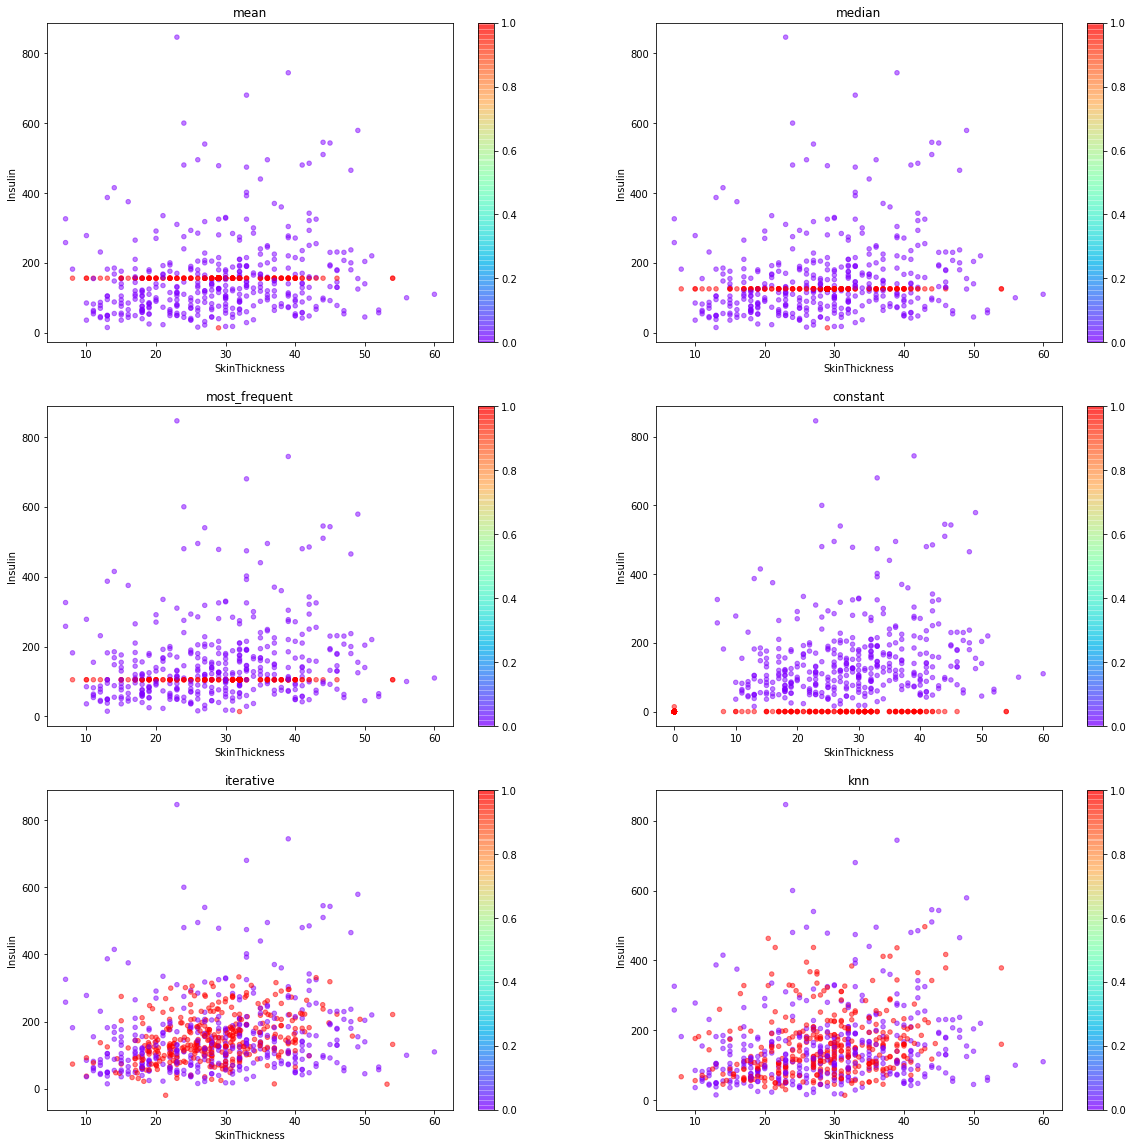

In [23]:
# imputed_dict : Contains all imputed dataframe along with complete case analysis

nullity = df['Insulin'].isnull() + df['SkinThickness'].isnull()
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for ax,df_keys in zip(ax.flatten(), imputed_dict):
    imputed_dict[df_keys].plot(x='SkinThickness', y='Insulin', alpha=0.5, c=nullity, kind='scatter', cmap='rainbow',
                      ax=ax, colorbar=True, title=df_keys)

# Measuring the Performance of various imputing methods

## Linear Regressor line

In [24]:
import statsmodels.api as sm
lr_perf = {}

for name, df_name in imputed_dict.items():
    X = sm.add_constant(df_name.iloc[:,:-1])
    y = df_name['Outcome']
    lm = sm.OLS(y,X).fit()
    lr_perf[name] = lm

/home/king/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
perf_dict = {}
for i,j in lr_perf.items():
    perf_dict[i] = j.params
    
for key, value in lr_perf.items():
    perf_dict[key]['r2_score'] = value.rsquared_adj * 100

perf_df = pd.DataFrame(perf_dict)

In [26]:
perf_df = perf_df.T

Text(0.5, 1.0, 'performance chat of various imputing techniques')

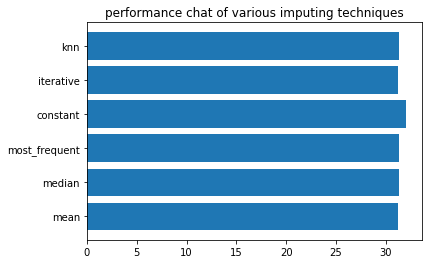

In [27]:
plt.barh(perf_df.index, perf_df.r2_score)
plt.title("performance chat of various imputing techniques")

# Evaluation by Density plot

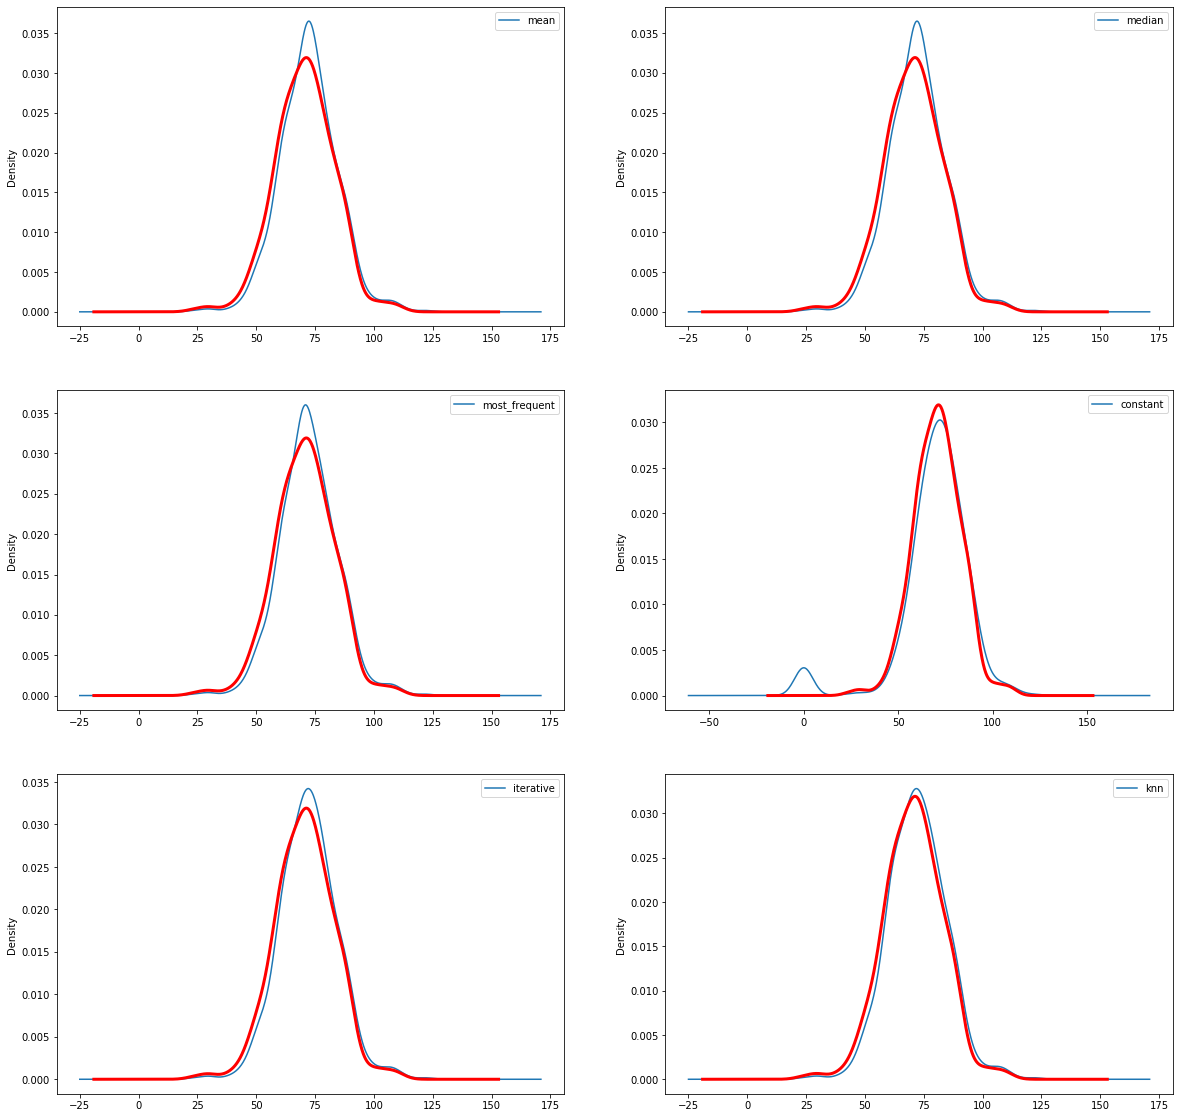

In [28]:
# imputed_dict : Contains all imputed dataframe along with complete case analysis
# Blood pressure

nullity = df['Insulin'].isnull() + df['SkinThickness'].isnull()
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for ax,df_keys in zip(ax.flatten(), imputed_dict):
    imputed_dict[df_keys]['BloodPressure'].plot(kind='kde',ax=ax)
    complete_case['BloodPressure'].plot(kind='kde',c='red',linewidth=3,ax=ax)
    ax.legend([str(df_keys)])

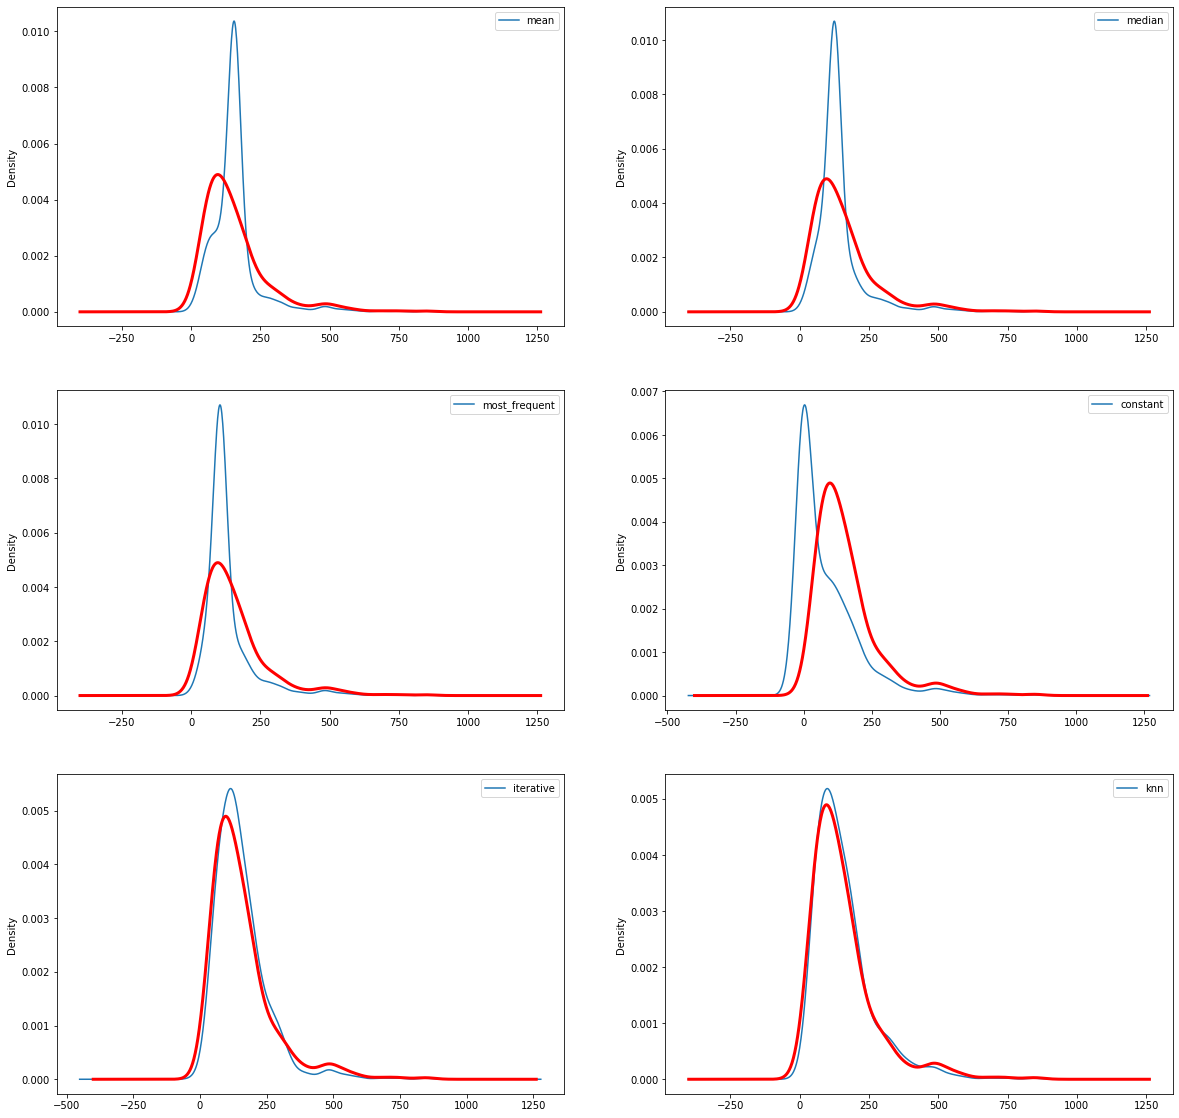

In [29]:
# imputed_dict : Contains all imputed dataframe along with complete case analysis
# Insulin

nullity = df['Insulin'].isnull() + df['SkinThickness'].isnull()
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
for ax,df_keys in zip(ax.flatten(), imputed_dict):
    imputed_dict[df_keys]['Insulin'].plot(kind='kde',ax=ax)
    complete_case['Insulin'].plot(kind='kde',c='red',linewidth=3,ax=ax)
    ax.legend([str(df_keys)])

<BarContainer object of 6 artists>

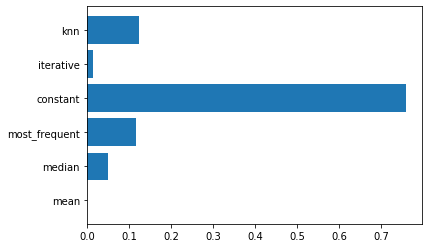

In [33]:
min_perf_ls = perf_df.loc[:,'r2_score'] - perf_df['r2_score'].min()
plt.barh(min_perf_ls.index, min_perf_ls)

In [ ]:
np.sort(min_p)

## Selection Criteria:
* KNN imputation method fits the complete case distribution more accurately
* We shouldn't consider the constant iterator as we fill 0 as the value. As 0 value is invalid in some columns.
* KNN imputation method performs better than rest (except constant). 

### Conclusion : We select KNN Imputed dataframe for further operations

In [31]:
# Exporting as CSV file.

imputed_dict['knn'].to_csv('Diabetes_not_null.csv')